# Prediction

## Related files:
- dc_bikes_clean.csv
- procedure guided by https://www.youtube.com/watch?v=RoKGvvMJAME

## Import package

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels.formula.api as sm

In [2]:
# read csv
df = pd.read_csv('../data/dc_bikes_clean.csv', parse_dates = True, index_col = 0)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,quarter,month,day,day_name,hour,minute,part_of_the_day
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,2011,1,1,1,Saturday,0,0,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,2011,1,1,1,Saturday,1,0,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,2011,1,1,1,Saturday,2,0,night


### update categorical variable data types

In [3]:
df['season'] = df['season'].astype('category')
df['weather'] = df['weather'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           17379 non-null  category
 1   holiday          17379 non-null  int64   
 2   workingday       17379 non-null  category
 3   weather          17379 non-null  category
 4   temp             17379 non-null  float64 
 5   atemp            17379 non-null  float64 
 6   humidity         17379 non-null  int64   
 7   windspeed        17379 non-null  float64 
 8   casual           10886 non-null  float64 
 9   registered       10886 non-null  float64 
 10  count            17379 non-null  int64   
 11  year             17379 non-null  int64   
 12  quarter          17379 non-null  int64   
 13  month            17379 non-null  int64   
 14  day              17379 non-null  int64   
 15  day_name         17379 non-null  object  
 16  hour 

### Run Linear Trend Forecast

In [4]:
# create only the necessary table, grouped in mean per month
df_new = df.groupby(['year', 'month'])
df_new = df_new['count'].mean().reset_index()
df_new = df_new.assign(period = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
df_new

,year,month,count,period
0,2011,1,61.082849,1
1,2011,2,86.893683,2
2,2011,3,92.198630,3
3,2011,4,145.171071,4
4,2011,5,202.325269,5
5,2011,6,220.861111,6
6,2011,7,218.963710,7
7,2011,8,191.789330,8
8,2011,9,180.145049,9
9,2011,10,191.732167,10


In [5]:
# method 1: calculate coefficients with np.polyfit
x = df_new['period']
y = df_new["count"]
fit = np.polyfit(x,y,1)
slope = fit[0]
intercept = fit[1]

print(slope, intercept)

5.735571637827458 116.17503162991447


In [6]:
# method 2: calculate coefficients with .fit()
model = sm.ols(formula ='count ~ period', data = df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     15.71
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           0.000659
Time:                        14:05:45   Log-Likelihood:                -126.45
No. Observations:                  24   AIC:                             256.9
Df Residuals:                      22   BIC:                             259.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.1750     20.677      5.619      0.000      73.294     159.056
period         5.7356      1.447      3.964      0.001       2.735       8.737
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                1.442
Skew:                          -0.335   Prob(JB):                        0.486
Kurtosis:                       2.004   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# calculate linear trend forecast
slope = fit[0]
intercept = fit[1]
lt = []

for index,value in enumerate([*df_new['period'].values]):
    model = (slope * value) + intercept
    lt.append(model)

print(lt)    

[121.91060326774193, 127.64617490556938, 133.38174654339684, 139.1173181812243, 144.85288981905177, 150.5884614568792, 156.3240330947067, 162.05960473253413, 167.7951763703616, 173.53074800818905, 179.2663196460165, 185.00189128384397, 190.7374629216714, 196.4730345594989, 202.20860619732633, 207.9441778351538, 213.67974947298126, 219.4153211108087, 225.15089274863618, 230.88646438646362, 236.62203602429108, 242.35760766211854, 248.09317929994597, 253.82875093777346]


In [8]:
# transform the forecast figures into a dataframe
lt_forecast = pd.DataFrame(lt)
lt_forecast.rename(columns = {0: 'lt_forecast'}, inplace = True)
lt_forecast = lt_forecast.assign(period = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
lt_forecast

,lt_forecast,period
0,121.910603,1
1,127.646175,2
2,133.381747,3
3,139.117318,4
4,144.852890,5
5,150.588461,6
6,156.324033,7
7,162.059605,8
8,167.795176,9
9,173.530748,10


In [9]:
df_new['count'].mean()

187.86967710275766

In [10]:
# calculate mean per month to have a seasonality index
sindex = []
for i in range(1,13):
    seasonality = (df_new[df_new['month'] == i]['count'].mean()) / df_new['count'].mean()
    sindex.append(seasonality)

print(sindex)

[0.45844076997185657, 0.5987402428464368, 0.7476030284917164, 0.9955221900954271, 1.2106846850852249, 1.339983998447059, 1.2324911535729928, 1.1820181265652094, 1.2352550578173664, 1.2054815421564127, 1.0305184820980555, 0.7632607228522418]


In [11]:
# transform  seasonality index into a series, add month
sindex = pd.DataFrame(sindex)
sindex.rename(columns = {0:'s_index'}, inplace = True)
sindex = sindex.assign(month = [1,2,3,4,5,6,7,8,9,10,11,12], period = [1,2,3,4,5,6,7,8,9,10,11,12])
sindex.head()

,s_index,month,period
0,0.458441,1,1
1,0.598740,2,2
2,0.747603,3,3
3,0.995522,4,4
4,1.210685,5,5


In [12]:
# concat replica of sindex to match the shape of lt_forecast dataframe (ideally it would work better if there was a vlookup function)
sindex2 = sindex.copy().drop(columns = 'period')
sindex2 = sindex2.assign(period = [13,14,15,16,17,18,19,20,21,22,23,24])
sindex_full = pd.concat([sindex, sindex2])
sindex_full.reset_index(drop = True, inplace = True)
sindex_full

,s_index,month,period
0,0.458441,1,1
1,0.598740,2,2
2,0.747603,3,3
3,0.995522,4,4
4,1.210685,5,5
5,1.339984,6,6
6,1.232491,7,7
7,1.182018,8,8
8,1.235255,9,9
9,1.205482,10,10


In [13]:
# merge lt_forecast and sindex_full before applying multiplication
outer_merge = pd.merge(lt_forecast, sindex_full, how = 'outer', on = 'period', indicator = False)
outer_merged = pd.merge(outer_merge, df_new, how = 'outer', on = 'period', indicator = False)
outer_merged

,lt_forecast,period,s_index,month_x,year,month_y,count
0,121.910603,1,0.458441,1,2011,1,61.082849
1,127.646175,2,0.598740,2,2011,2,86.893683
2,133.381747,3,0.747603,3,2011,3,92.198630
3,139.117318,4,0.995522,4,2011,4,145.171071
4,144.852890,5,1.210685,5,2011,5,202.325269
5,150.588461,6,1.339984,6,2011,6,220.861111
6,156.324033,7,1.232491,7,2011,7,218.963710
7,162.059605,8,1.182018,8,2011,8,191.789330
8,167.795176,9,1.235255,9,2011,9,180.145049
9,173.530748,10,1.205482,10,2011,10,191.732167


In [14]:
# apply multiplication
outer_merged['seasonal_forecast'] = outer_merged['lt_forecast'] * outer_merged['s_index']
final_forecast = outer_merged.drop(columns = 'month_x')
final_forecast

,lt_forecast,period,s_index,year,month_y,count,seasonal_forecast
0,121.910603,1,0.458441,2011,1,61.082849,55.888791
1,127.646175,2,0.598740,2011,2,86.893683,76.426902
2,133.381747,3,0.747603,2011,3,92.198630,99.716598
3,139.117318,4,0.995522,2011,4,145.171071,138.494377
4,144.852890,5,1.210685,2011,5,202.325269,175.371175
5,150.588461,6,1.339984,2011,6,220.861111,201.786129
6,156.324033,7,1.232491,2011,7,218.963710,192.667988
7,162.059605,8,1.182018,2011,8,191.789330,191.557390
8,167.795176,9,1.235255,2011,9,180.145049,207.269840
9,173.530748,10,1.205482,2011,10,191.732167,209.188114


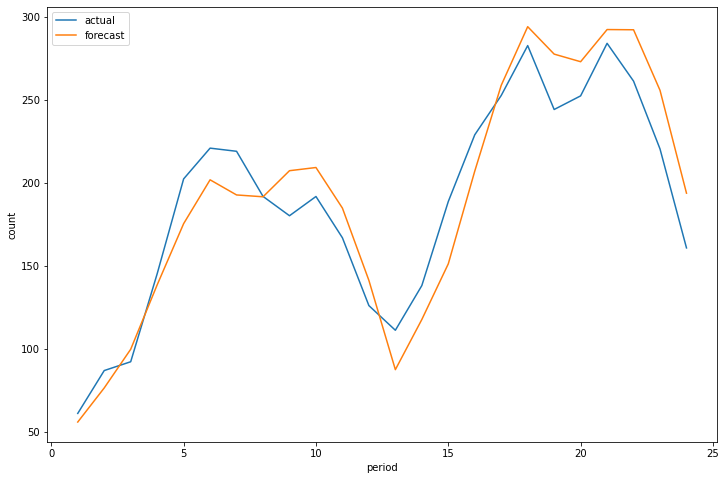

In [15]:
# plotting
plt.figure(figsize = (12,8))

sns.lineplot(data = df_new,
            x = 'period',
            y = 'count',
              markers = '*',
            ci = None)

sns.lineplot(data = final_forecast,
            x = 'period',
            y = 'seasonal_forecast',
             markers = '*', 
            ci = None);

plt.legend(labels = ['actual', 'forecast']);

In [16]:
# taking these results, this anlaysis can be extended further to the upcoming months to forecast future demand